In [32]:
## select all sector on company
import pandas as pd
# Import df
df = pd.read_csv('final_transactions_dataset.csv')
company = df[["company","sector"]].drop_duplicates().sort_values("company")
company

,company,sector
32,AAPL,TECH
18,AMZN,TECH
2,AXP,BANK
1,BAC,BANK
0,BBY,RETAIL
34,COST,RETAIL
11,DB,BANK
57,F,AUTO
6,FB,TECH
14,GM,AUTO


In [16]:
# save model
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import datetime as dt
import joblib

## separate to bank sector investment data
company="GOOG"
bank_df = df[df["company"]==company].sort_values('date_BUY_fix')

# select column
X_plot = bank_df[['date_BUY_fix','Volatility_Buy','inflation','price_BUY']].copy().drop_duplicates()

X_plot['date_BUY_fix']=pd.to_datetime(X_plot['date_BUY_fix'])

X = X_plot.copy()

# convert date to int
X['date_BUY_fix']=X['date_BUY_fix'].astype('int64') // 10**9
# X['date_SELL_fix_int']=pd.to_datetime(X['date_SELL_fix'])
# X['date_SELL_fix_int']=X['date_SELL_fix_int'].astype('int64') // 10**9

X_select = X[['date_BUY_fix','Volatility_Buy','inflation']].copy()
Y = X[['price_BUY']].copy()

# Create Polynomial features
deg = 3
poly_features = PolynomialFeatures(degree=deg)
X_poly = poly_features.fit_transform(X_select)

# Create a linear regression model
model = LinearRegression()
# Fit the model to the data
model.fit(X_poly,Y)

file_name = company+"_polynomial_model.pkl"
joblib.dump(model, file_name)

['GOOG_polynomial_model.pkl']

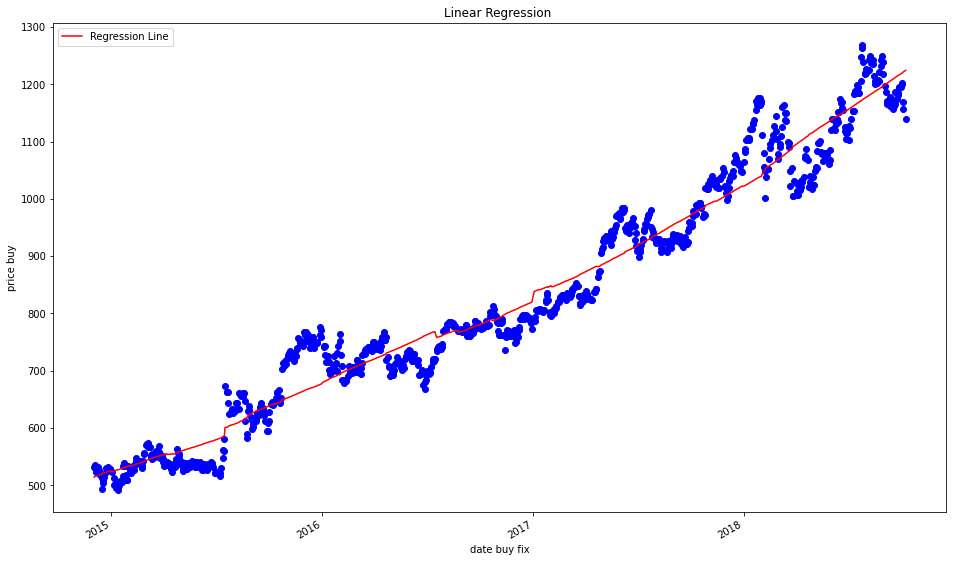

 Slope (b1): [ 0.00000000e+00 -6.79953749e-22  9.24446373e-32 -1.10440461e-29
 -1.33907854e-14 -5.73204829e-24 -2.14991359e-22 -1.76854447e-32
  2.13589106e-31 -4.91461805e-31  6.88465002e-24  1.35913640e-16
  3.50713944e-18 -2.40035764e-23  3.65703987e-22 -5.03222723e-22
 -1.09665423e-32  9.64391344e-32  3.53470582e-31 -3.94154616e-30]
 Intercept (b0): [7756.45210435]
mean square error: 1728.3610554867967
root mean square error: 41.57356197737688
R-square: 0.9589842241341353


In [17]:
# load model
import joblib
import math
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

file_name = company+"_polynomial_model.pkl"
load_model = joblib.load(file_name)

# Get the coefficients ( slope and intercept )
slope = load_model.coef_[0]
intercept = load_model.intercept_
# Make predictions for the same X values
Y_train_pred = load_model.predict(X_poly)

# Plot the data points and the regression line
plt.figure(figsize=(16,10))
# Create a date range
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(mdates.YearLocator())
plt.scatter(X_plot['date_BUY_fix'] ,Y , color ='blue')
plt.plot(X_plot['date_BUY_fix'] ,Y_train_pred , label ='Regression Line', color ='red')
plt.gcf().autofmt_xdate()
plt.xlabel('date buy fix')
plt.ylabel('price buy')
plt.legend()
plt.title('Linear Regression ')
plt.show()
# Print the coefficients
print ( f" Slope (b1): { slope }")
print ( f" Intercept (b0): { intercept }")

# evaluation
mse = mean_squared_error(Y,Y_train_pred)
rsme = math.sqrt(mse)
r2 = r2_score(Y,Y_train_pred)
# MSE
print(f"mean square error: {mse}")
# RMSE
print(f"root mean square error: {rsme}")
# R - square
print(f"R-square: {r2}")